In [5]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient



In [21]:
#Local variables: figure out how to automate.


JobIDint = 1537126
Clade = "squamate"
save_directory = '/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/' + Clade + '/' 
os.makedirs(save_directory, exist_ok=True)
JOBID = str(JobIDint)
tree_sizes_1 = list(range(10,100,5))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


In [9]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

transfer is done


In [10]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

In [ ]:
#for some reason, only went until 430 

In [11]:
print(target_directory)
#look at one mpd randomization from one trial to see sample data structure. 
#target_file_get = target_directory +  "100_3992out.csv"
#print(target_file_get)
#df = pd.read_csv(target_file_get)
#df.index =['pd', 'mpd', "mntd"]
#print(df)
#df.iloc[0]['mpd.rnd']

#stat_temp = df.loc['mpd']
#print(stat_temp)


/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1537126_output_files/


In [22]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [23]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [24]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [25]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals
new_pd = new_pd_smallvals
print(new_mpd)

{'mpd10': [350.123660977778, 341.138102133333, 201.864046888889, 352.920950666667, 311.616902622222, 273.337925511111, 324.491119088889, 291.414235555556, 345.159463577778, 312.769409644444, 279.794115488889, 363.227187555556, 328.863892333333, 341.585590044444, 322.913877777778, 343.085930911111, 328.294725577778, 343.020239888889, 343.016639844444, 334.0292372, 272.537752977778, 290.124748044444, 348.821074088889, 342.159797711111, 313.497011844444, 335.2685904, 363.983066688889, 346.966342866667, 341.595056155556, 287.639890288889, 275.688244444444, 303.935332466667, 323.091891177778, 326.722749933333, 282.065763333333, 321.252579533333, 284.528716911111, 285.598322733333, 286.15259, 309.913315311111, 269.9024324, 344.112108444444, 340.708781955556, 343.788270377778, 316.458498066667, 324.516947688889, 269.218210488889, 346.669042022222, 312.218036111111, 324.561439377778, 296.927216022222, 290.498754333333, 341.388392666667, 330.158418222222, 356.199191933333, 262.289647133333, 312

In [26]:
data = mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



NameError: name 'mpd' is not defined

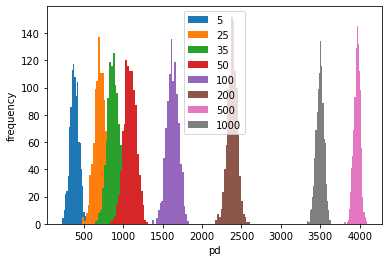

In [90]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_pd['pd10'],bins = 20)
#plt.hist(new_mpd['mpd10'],bins = 20)
#plt.hist(new_mpd['mpd15'],bins = 20)
#plt.hist(new_mpd['mpd20'],bins = 20)
plt.hist(new_pd['pd25'],bins = 20)
#plt.hist(new_mpd['mpd30'],bins = 20)
plt.hist(new_pd['pd35'],bins = 20)
#plt.hist(new_mpd['mpd40'],bins = 20)
#plt.hist(new_mpd['mpd45'],bins = 20)
plt.hist(new_pd['pd50'],bins = 20)
plt.hist(new_pd['pd100'],bins = 20)
plt.hist(new_pd['pd200'],bins = 20)
plt.hist(new_pd['pd500'],bins = 20)
plt.hist(new_pd['pd400'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
#plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("5","25",  "35", "50", "100", "200", "500", "1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [30]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

#issue: have some nan values. 

([318.56999772140057, 319.53300327424876, 319.4848789843249, 319.3128091851425, 318.97411318701154, 319.0795688813987, 319.690711033762, 320.01731596455386, nan, 319.62439895954736, 319.55084941730576, 319.982357123777, 320.06095236403416, 319.8461533895278, 320.0026517625034, 319.6721682686849, 320.1414811595325, 320.25501754546576], [322.3058868808216, 322.2831045937132, 321.702358945854, 321.3566808271642, 320.7578688849884, 320.63344906921645, 321.0753631750738, 321.2878190801815, nan, 320.65967101654684, 320.58889258377, 320.88634808663653, 320.8484686456155, 320.5910113183596, 320.6986450017561, 320.2840940006272, 320.64575561082205, 320.7011425397993], [320.4379423011111, 320.90805393398097, 320.59361896508943, 320.33474500615336, 319.86599103599997, 319.8565089753076, 320.3830371044179, 320.6525675223677, nan, 320.1420349880471, 320.0698710005379, 320.43435260520675, 320.45471050482485, 320.2185823539437, 320.35064838212975, 319.97813113465605, 320.39361838517726, 320.478080042

In [36]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        print(lower_bound_bootstrap)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [37]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

#seems like size of 55 throws an error. 

mpd10
363.98401412777787
250.75170317333345
mpd15
355.8575654742854
268.9665676671427
mpd20
349.96334319157864
280.1209521855267
mpd25
346.523811050833
281.222397239833
mpd30
343.1558696880455
288.61212643298836
mpd35
342.2047286105044
293.3638702386553
mpd40
339.89154869765997
294.957325024744
mpd45
338.7503473048993
297.4119510929294
mpd50


IndexError: index -1 is out of bounds for axis 0 with size 0

In [54]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

In [29]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)


NameError: name 'CI_mntd_bootstrap' is not defined

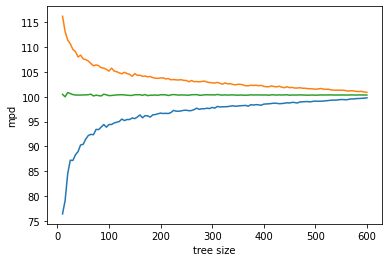

In [66]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.savefig(os.path.join(save_directory, 'mpd_95CI.jpg'), dpi=1200)


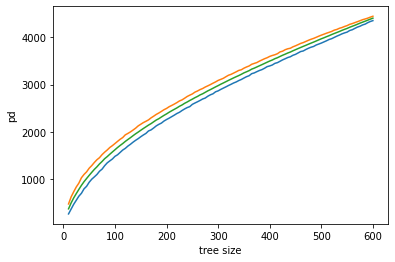

In [67]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.savefig(os.path.join(save_directory, 'pd_95CI.jpg'), dpi=1200)



In [68]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv(os.path.join(save_directory,"CI_mpd_output_bootstrap_bird.csv"))


In [69]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv(os.path.join(save_directory,"CI_mntd_output_bootstrap_bird.csv"))

In [70]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv(os.path.join(save_directory,"CI_pd_output_bootstrap_bird.csv"))